# Tutorial

## Scheduler and Learning Rate

{'optimizer': {'SGD': {'dampening': 0, 'lr': 0.01, 'momentum': 0.9, 'nesterov': True, 'weight_decay': 0}}, 'sequential_scheduler': False, 'scheduler': [{'CosineAnnealingLR': {'T_max': 50, 'eta_min': 1e-05, 'verbose': False}}, {'ExponentialLR': {'gamma': 0.96, 'last_epoch': -1, 'verbose': False}}], 'hyp': {'imgsz': {'symmetry': [640, 640], 'eye': [420, 500], 'mouth': [640, 420], 'forehead': [640, 300], 'hb_direct': [640, 640]}, 'RandomHorizontalFlip': 0.5, 'Normalize': {'mean': [0.5, 0.5, 0.5], 'std': [0.5, 0.5, 0.5]}, 'ColorJitter': {'brightness': 0.1, 'contrast': 0.1, 'saturation': 0.1, 'hue': 0.05}, 'RandomAffine': {'degrees': 3, 'translate': [0.01, 0.01]}, 'GaussianBlur': {'kernel_size': [7, 7], 'sigma': [0.1, 2.0]}, 'RandomAdjustSharpness': {'probability': 0.1, 'val': 3}}}
{'_schedulers': [<torch.optim.lr_scheduler.CosineAnnealingLR object at 0x000001CF1DA8F280>, <torch.optim.lr_scheduler.ExponentialLR object at 0x000001CF1DA8F190>]}


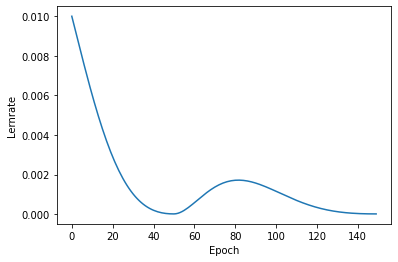

In [1]:
from torchvision.models import resnet18
import matplotlib.pyplot as plt
import yaml
from utils.pytorch_utils import select_optimizer_and_scheduler
from utils.specs import validate_yaml_config


model = resnet18(pretrained=True)
epochs = 150

pth = "./models/hyp.yaml"
with open(pth, 'r', encoding="UTF-8") as yaml_file:
        yml_hyp = yaml.safe_load(yaml_file)
        error, tru_fal = validate_yaml_config(yml_hyp)
        print(yml_hyp)
        assert tru_fal, f"Error in YAML-Configuration (Path = {pth}): \n" + "\n".join(error)
        scheduler, optimizer = select_optimizer_and_scheduler(yml_hyp, model, epochs)
        
        
print(scheduler)
print(scheduler.__dict__)
lrs1 = []
for i in range(epochs):
    temp = optimizer.state_dict()
    lrs1.append(temp['param_groups'][0]['lr'])
    optimizer.step()
    
    scheduler.step()
    
plt.plot(list(range(epochs)), lrs1, label='')
#plt.legend()
plt.ylabel("Lernrate")
plt.xlabel("Epoch")
plt.savefig("test.svg")
plt.show()


In [2]:
import logging

from hbmedicalprocessing.utils.config import LOGGER
from hbmedicalprocessing.utils.general import set_logging

logging.basicConfig(level=logging.INFO)

print(LOGGER)

set_logging("test")

LOGGER.debug("test1")
LOGGER.info("test2")
LOGGER.warning("test3")
LOGGER.error("test4")
LOGGER.critical("test5")

INFO:hbmedicalprocessing.utils.config:testEnvironment: Local_Rank=-1 Rank=-1 World-Size=1
INFO:hbmedicalprocessing.utils.config:testEnvironment: Cuda-Available=False Device-Count=0 Distributed-Available=True
INFO:hbmedicalprocessing.utils.config:test2
ERROR:hbmedicalprocessing.utils.config:test4
CRITICAL:hbmedicalprocessing.utils.config:test5


<Logger hbmedicalprocessing.utils.config (INFO)>


In [3]:
import hbmedicalprocessing.detect as dt
import hbmedicalprocessing.train as t
from hbmedicalprocessing.utils.general import set_logging

set_logging("test")

INFO:hbmedicalprocessing.utils.config:testEnvironment: Local_Rank=-1 Rank=-1 World-Size=1
INFO:hbmedicalprocessing.utils.config:testEnvironment: Cuda-Available=False Device-Count=0 Distributed-Available=True


In [ ]:
dt.run(source="../../test_data", batch_size=4, half=True)
print("Done")

INFO:utils.config:detect: Starting Detection...
INFO:utils.config:Torch Version: torch 1.10.0+cpu Selected Devices: CPU

INFO:utils.config:detect: Found 12 Patients. List: ['../../test_data\\Faziale_Reanimation\\0001', '../../test_data\\Faziale_Reanimation\\0002', '../../test_data\\Faziale_Reanimation\\0003', '../../test_data\\Faziale_Reanimation\\0004', '../../test_data\\Faziale_Reanimation\\0005', '../../test_data\\Faziale_Reanimation\\0006', '../../test_data\\Muskeltransplantation\\0001', '../../test_data\\Muskeltransplantation\\0002', '../../test_data\\Muskeltransplantation\\0003', '../../test_data\\Muskeltransplantation\\0004', '../../test_data\\Muskeltransplantation\\0005', '../../test_data\\Muskeltransplantation\\0006']
INFO:utils.config:detect: Using Native Image Access!


In [ ]:
t.run(source="../../test_data", batch_size=4, config="./models/hyp.yaml")
print("Done")